## Visualize Cell Health Predictions on Repurposing Hub Data

**Gregory Way, 2019**

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

## Load Functions

In [2]:
visualize_model <- function(
    target_variable,
    legend_title,
    output_dir,
    title = "none",
    dpi = 500,
    save_figure = TRUE
) {
    
    plot_gg <- ggplot(cp_embedding_df, aes(x = umap_x, y = umap_y)) +
        geom_point(aes_string(color = target_variable),
                   size = 0.5,
                   pch = 16,
                   alpha = 0.6) +
        theme_bw() +
        theme(legend.text = element_text(size = 8)) +
        scale_color_viridis_c(name = legend_title) +
        xlab("UMAP 1") +
        ylab("UMAP 2")
    
    if (title != "none") {
        plot_gg <- plot_gg + ggtitle(title)
    }
    if (save_figure) {
        output_file <- file.path(
            output_dir,
            paste0(
                "umap_repurposing_cell_painting_",
                target_variable,
                "_consensus.png"
            )
        )
        ggsave(output_file, height = 5, width = 6, dpi = dpi)
    }
    
    print(plot_gg)
}

## Set Constants

In [3]:
consensus <- "modz"

output_dir <- file.path("figures", "umap", consensus)
dir.create(output_dir)

## Load and Process Data

In [4]:
# Load Data
data_dir <- file.path("repurposing_cellhealth_shiny", "data")
real_file <- file.path(
    data_dir,
    paste0("moa_cell_health_", consensus, ".tsv.gz")
)

cp_embedding_df <- readr::read_tsv(real_file, col_types = readr::cols())

cp_embedding_df <- cp_embedding_df %>%
    dplyr::mutate(Metadata_Treatment = cp_embedding_df$Image_Metadata_Well)

cp_embedding_df$Metadata_Treatment[cp_embedding_df$Image_Metadata_Well == "collapsed"] = "Compound"
cp_embedding_df$Metadata_Treatment[cp_embedding_df$Image_Metadata_Well != "collapsed"] = "DMSO"

print(dim(cp_embedding_df))
head(cp_embedding_df, 3)

[1] 9434   82


Image_Metadata_Well Metadata_broad_core_id Metadata_broad_sample 
1 collapsed           BRD-A00147595          BRD-A00147595-001-01-5
2 collapsed           BRD-A00147595          BRD-A00147595-001-01-5
3 collapsed           BRD-A00147595          BRD-A00147595-001-01-5
  Metadata_dose_recode Metadata_mmoles_per_liter umap_x     umap_y   
1 1                    0.04115226                -1.3160720 0.6908637
2 2                    0.12345679                 0.9882369 2.0605938
3 3                    0.37037037                 0.5819897 1.6056529
  pert_id       pert_iname    pert_type ⋯
1 BRD-A00147595 balaglitazone trt_cp    ⋯
2 BRD-A00147595 balaglitazone trt_cp    ⋯
3 BRD-A00147595 balaglitazone trt_cp    ⋯
  cell_health_modz_target_cc_edu_pos_high_n_spots_h2ax_mean
1 -0.03586543                                              
2  0.07798809                                              
3  0.17295494                                              
  cell_health_modz_target_cc_edu_pos_n_objects
1 -0.006384126                                
2 -0.455297280                                
3 -0.135244943                                
  cell_health_modz_target_cc_g2_ph3_pos_n_spots_per_nucleus_area_mean
1 0.1725106                                                          
2 0.3500627                                                          
3 0.2420948                                                          
  cell_health_modz_target_cc_cc_ph3_pos_hoechst_mitosis_mean
1 -0.16709212                                               
2 -0.29391082                                               
3 -0.09095288                                               
  cell_health_modz_target_cc_all_large_round_polyploid_mean
1 -0.07208749                                              
2  1.56757980                                              
3  1.20648524                                              
  cell_health_modz_target_cc_polyploid_n_spots_per_nucleus_area_mean
1 0.01255562                                                        
2 0.19496707                                                        
3 0.11901877                                                        
  cell_health_modz_target_cc_g1_n_spots_mean
1 0.09096116                                
2 0.20044839                                
3 0.11203316                                
  cell_health_modz_target_cc_g2_ph3_neg_n_spots_per_nucleus_area_mean
1 0.04742662                                                         
2 0.28475814                                                         
3 0.24332336                                                         
  cell_health_modz_target_cc_cc_g1_mean Metadata_Treatment
1 0.136618171                           Compound          
2 0.007192934                           Compound          
3 0.074837283                           Compound

In [5]:
table(
    cp_embedding_df$Metadata_dose_recode,
    cp_embedding_df$Metadata_Treatment
)

   
    Compound DMSO
  0        0   24
  1     1584    0
  2     1568    0
  3     1568    0
  4     1568    0
  5     1562    0
  6     1558    0
  7        2    0

## Visualize Metadata and Cell Health Variables

Warning message:
“Using size for a discrete variable is not advised.”

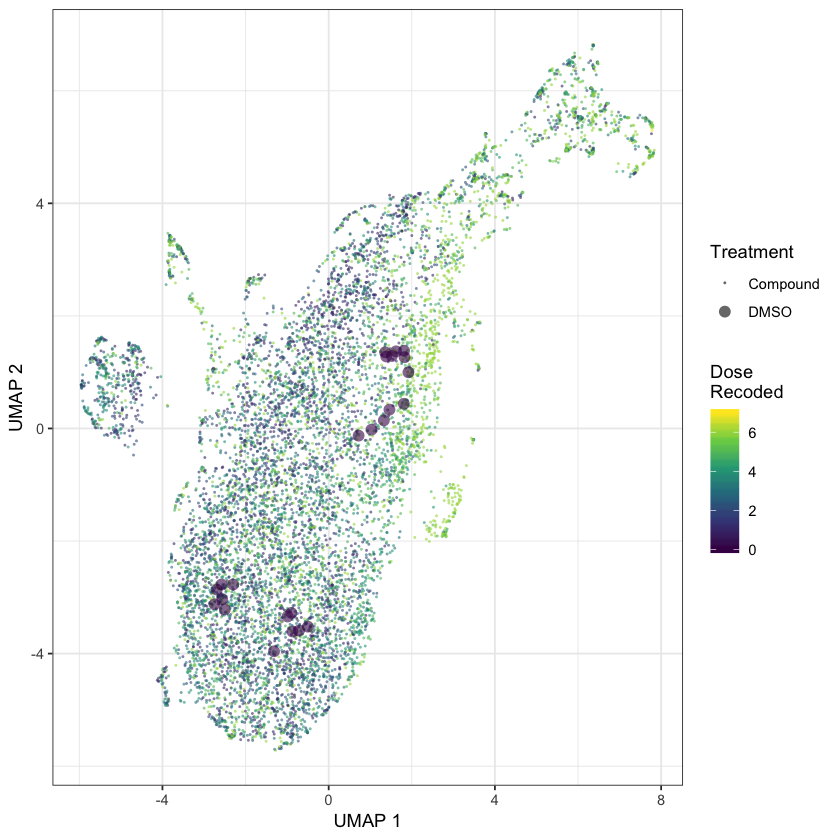

In [6]:
ggplot(cp_embedding_df,
       aes(x = umap_x, y = umap_y)) +
    geom_point(aes(color = Metadata_dose_recode,
                   size = paste(Metadata_Treatment)),
               pch = 16,
               alpha = 0.6) +
    theme_bw() +
    scale_color_viridis_c(name = "Dose\nRecoded") +
    scale_size_discrete("Treatment",
                        range = c(0.5, 3)) +
    xlab("UMAP 1") +
    ylab("UMAP 2")

output_file <- file.path(
    output_dir,
    paste0("umap_repurposing_cell_painting_dose_consensus_", consensus, ".png")
)
ggsave(output_file, height = 5, width = 6, dpi = 500)

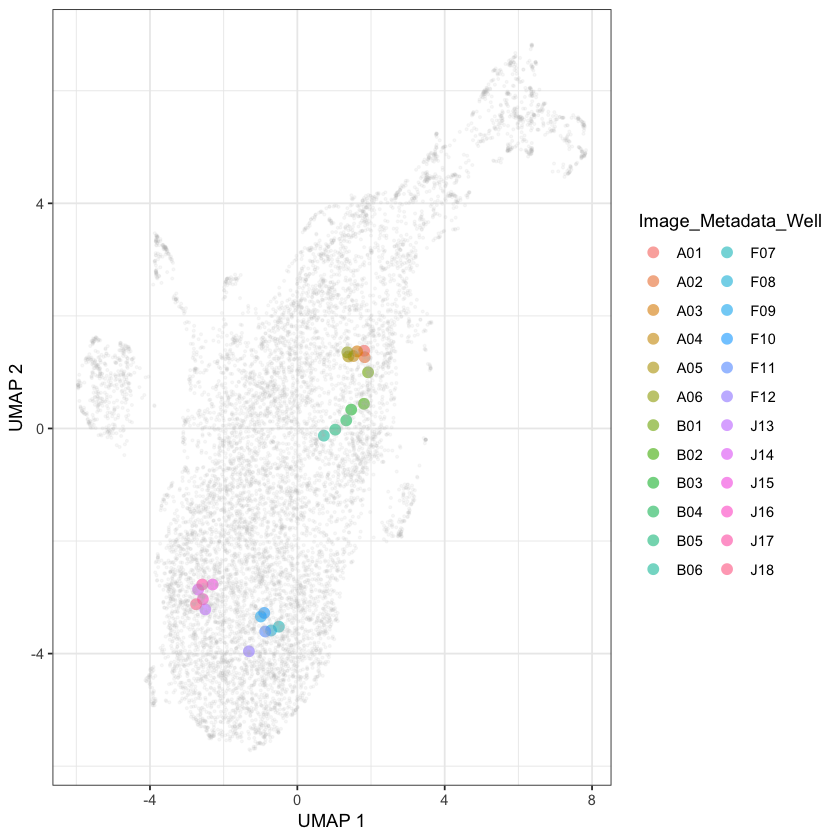

In [7]:
ggplot(cp_embedding_df %>% dplyr::filter(Metadata_Treatment == "DMSO"),
       aes(x = umap_x, y = umap_y)) +
    geom_point(aes(color = Image_Metadata_Well),
               pch = 16,
               size = 3,
               alpha = 0.6) +
    geom_point(data = cp_embedding_df, color = "grey", alpha = 0.1, size = 0.5) +
    theme_bw() +
    xlab("UMAP 1") +
    ylab("UMAP 2")

output_file <- file.path(
    output_dir,
    paste0("umap_repurposing_cell_painting_dose_consensus_dmso_", consensus, ".png")
)

ggsave(output_file, height = 5, width = 6, dpi = 500)

## Certain Models had Better Performance in A549

We applied all models to the Drug Repurposing Set data.

Here, output visualizations of several of the top models.

![Performance Rank](../3.train/figures/cell_line_performance/modz/ranked_models_A549_modz.png)

In [8]:
# Load feature mapping
mapping_dir <- file.path("..", "1.generate-profiles", "data", "labels")
mapping_file <- file.path(mapping_dir, "feature_mapping_annotated.csv")
map_df <- readr::read_csv(
    mapping_file,
    col_types = readr::cols(.default = readr::col_character())
)

print(dim(map_df))
head(map_df, 3)

[1] 75  7


original_name updated_name feature_type measurement maria_thumbs_up assay
1 Row           well_row     metadata     metadata    NA              NA   
2 Column        well_col     metadata     metadata    NA              NA   
3 Plate Name    plate_name   metadata     metadata    NA              NA   
  description
1 NA         
2 NA         
3 NA

## Visualizing Specific Cell Health Models

Only a few are shown here, but all are saved in a separate folder.

### Predicting Number of Live Cells

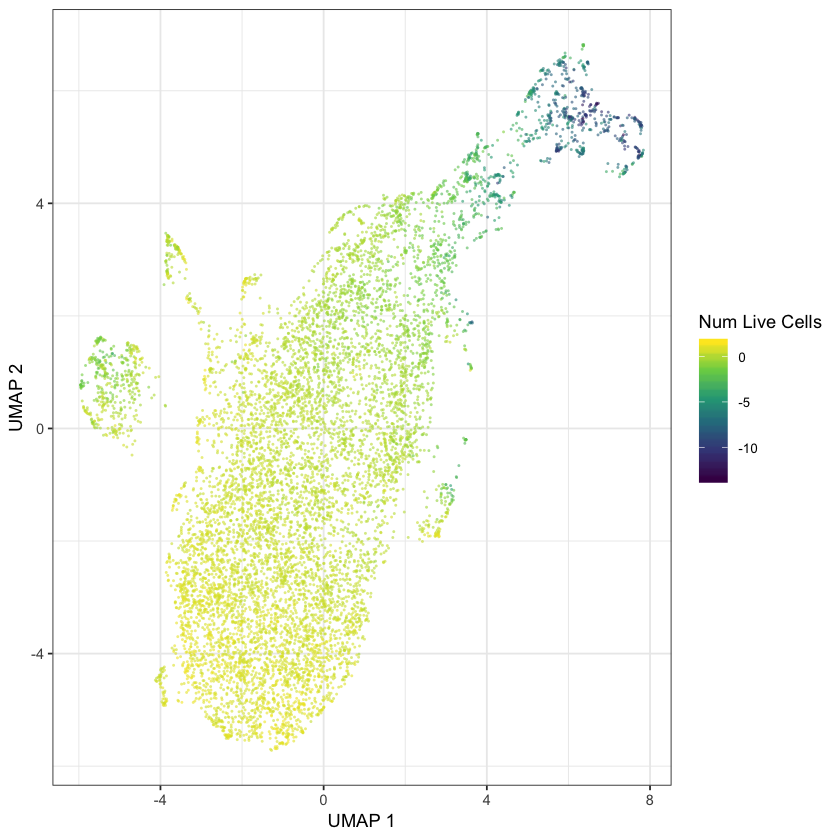

In [9]:
visualize_model(
    target_variable = "cell_health_modz_target_vb_num_live_cells",
    legend_title = "Num Live Cells",
    output_dir = "none",
    save = FALSE
)

### Predicting Live Width:Length

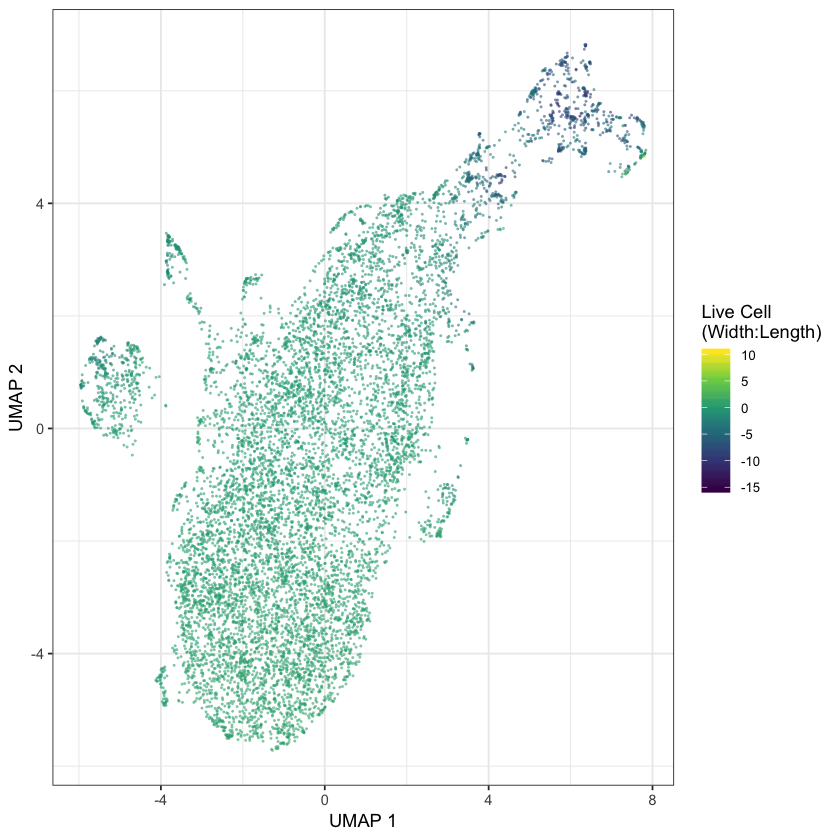

In [10]:
visualize_model(
    target_variable = "cell_health_modz_target_vb_live_cell_width_length",
    legend_title = "Live Cell\n(Width:Length)",
    output_dir = "none",
    save = FALSE
)

### Predicting Live Cell Roundness

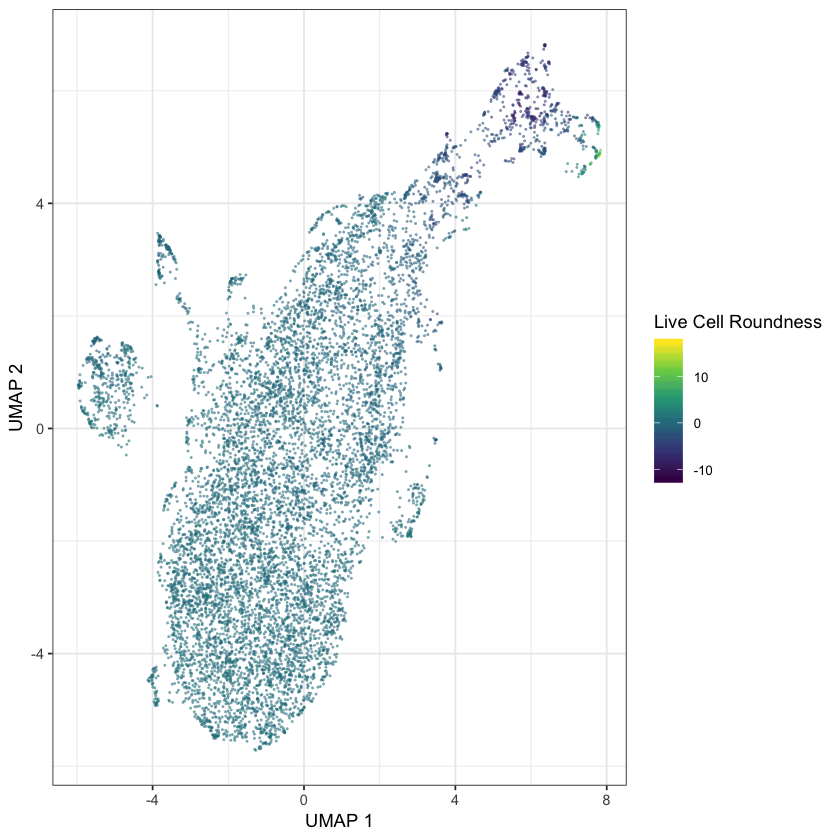

In [11]:
visualize_model(
    target_variable = "cell_health_modz_target_vb_live_cell_roundness",
    legend_title = "Live Cell Roundness",
    output_dir = "none",
    save = FALSE
)

### Predicting Number of Objects

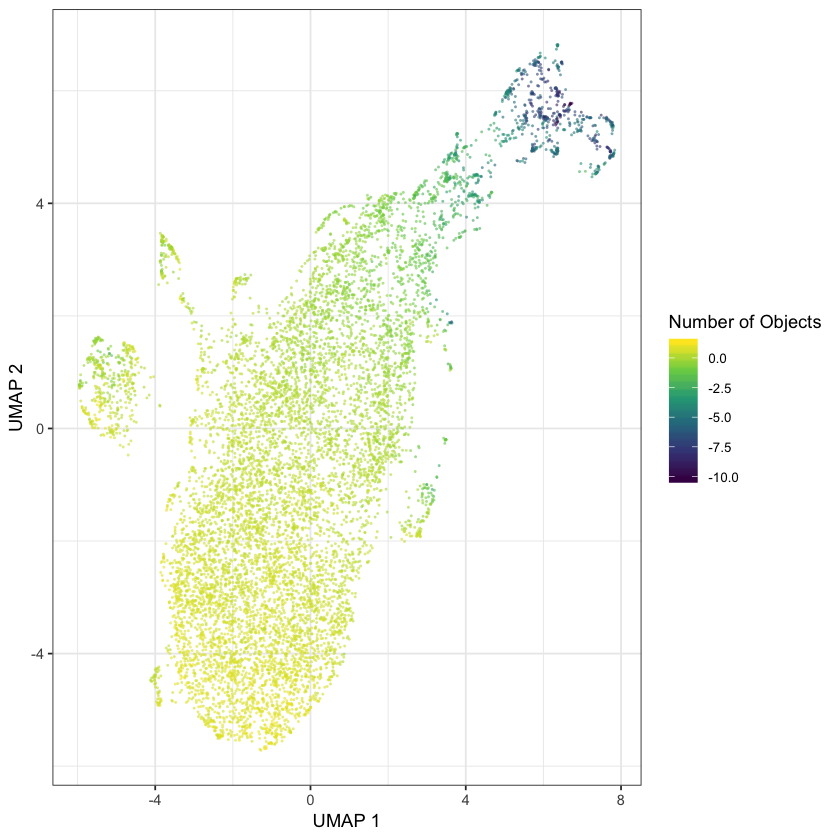

In [12]:
visualize_model(
    target_variable = "cell_health_modz_target_cc_all_n_objects",
    legend_title = "Number of Objects",
    output_dir = "none",
    save = FALSE
)

### Predicting Live Cell Area

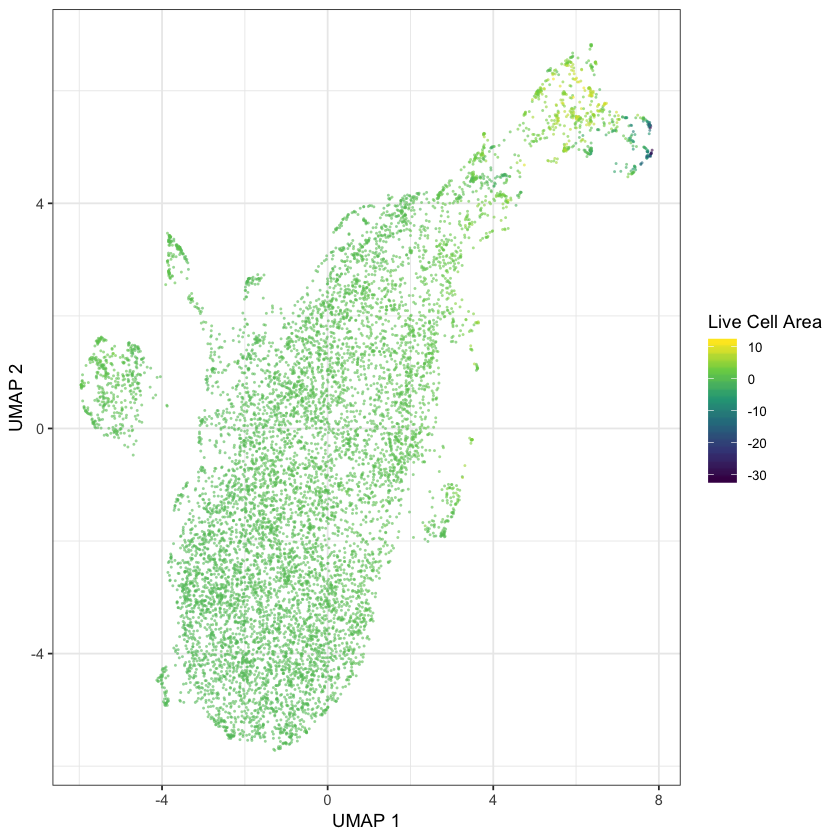

In [13]:
visualize_model(
    target_variable = "cell_health_modz_target_vb_live_cell_area",
    legend_title = "Live Cell Area",
    output_dir = "none",
    save = FALSE
)

### Predicting Number of Objects in Cell Cycle Stage

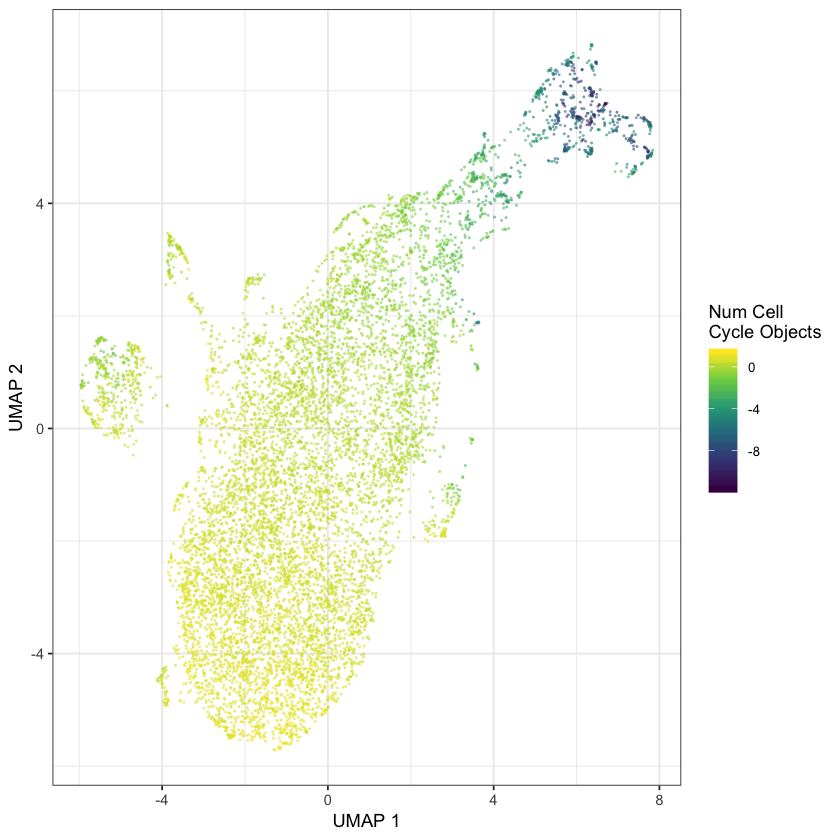

In [14]:
visualize_model(
    target_variable = "cell_health_modz_target_cc_cc_n_objects",
    legend_title = "Num Cell\nCycle Objects",
    output_dir = "none",
    save = FALSE
)

### Predicting Number of Objects in G1

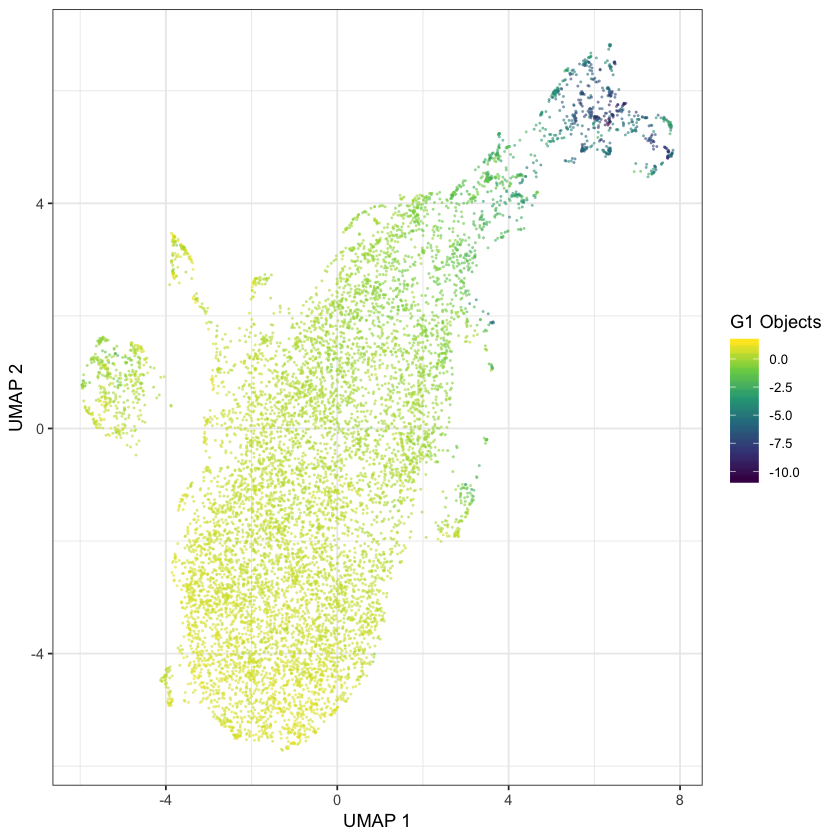

In [15]:
visualize_model(
    target_variable = "cell_health_modz_target_cc_g1_n_objects",
    legend_title = "G1 Objects",
    output_dir = "none",
    save = FALSE
)

### Predicting EdU positive intensity

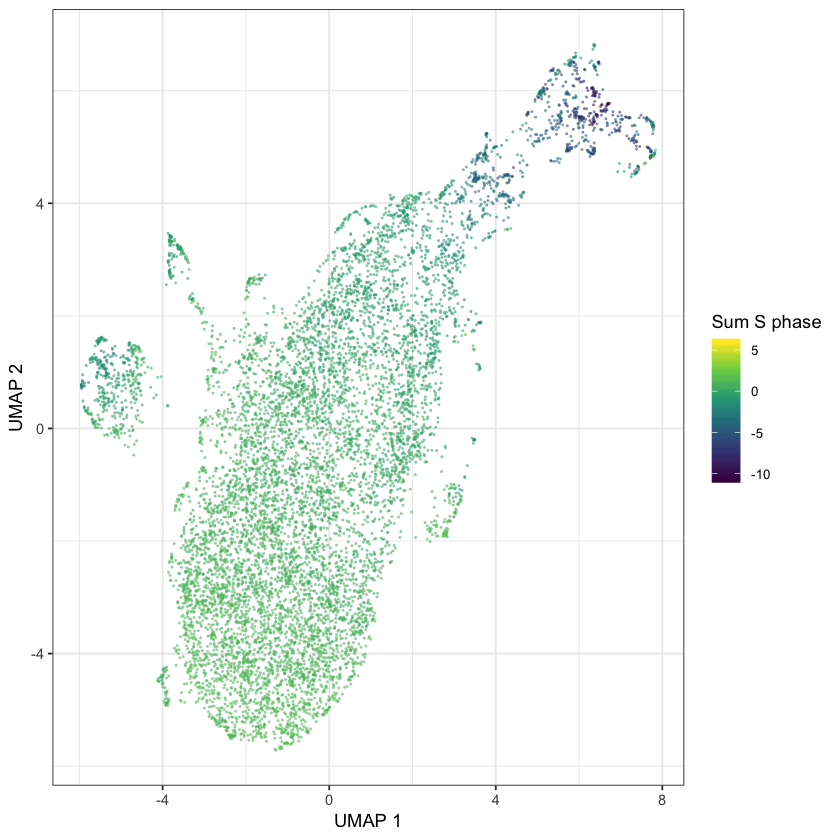

In [16]:
visualize_model(
    target_variable = "cell_health_modz_target_cc_edu_pos_alexa647_intensity_nucleus_area_sum",
    legend_title = "Sum S phase",
    output_dir = "none",
    save = FALSE
)

### Predicting ROS

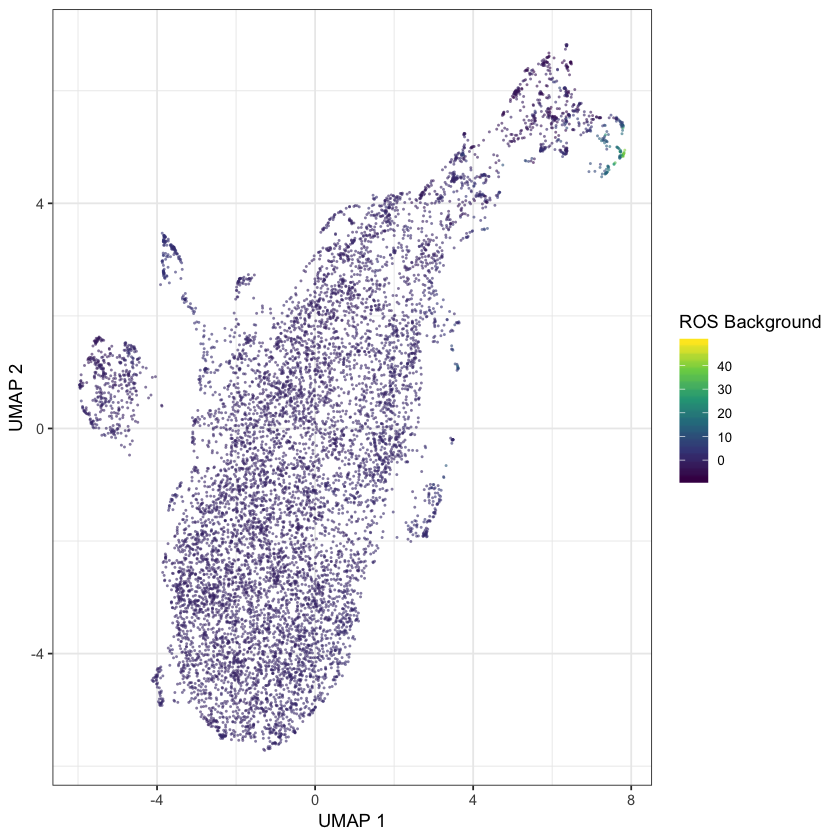

In [17]:
visualize_model(
    target_variable = "cell_health_modz_target_vb_ros_back_mean",
    legend_title = "ROS Background",
    output_dir = "none",
    save = FALSE
)

## Visualize All Cell Health Variables

In [18]:
cell_health_variables <- colnames(
    cp_embedding_df %>%
        dplyr::select(starts_with("cell_health_modz_target_"))
    )

length(cell_health_variables)

[1] 70

In [19]:
pdf_file <- file.path(
    output_dir,
    paste0("repurposing_hub_umaps_consensus_", consensus, ".pdf")
)
pdf(pdf_file, width = 5, height = 5, onefile = TRUE)

for (cell_health_variable in cell_health_variables) {
    umap_gg <- visualize_model(
        target_variable = cell_health_variable,
        legend_title = "Prediction:",
        title = cell_health_variable,
        dpi = 200,
        save_figure = FALSE
    )
}

dev.off()

pdf 
  2

## Visualize Model Scores on DMSO samples

In [20]:
# Set some plotting defaults
dye_colors <- c(
    "hoechst" = "#639B94",
    "edu" = "#E45242",
    "gh2ax" = "#E2C552",
    "ph3" = "#7B9C32",
    "hoechst_gh2ax" = "#535f52",
    "hoechst_edu" = "#73414b",
    "edu_gh2ax" = "#e37a48",
    "caspase" = "#F7B1C1",
    "draq" = "#FF6699",
    "draq_caspase" = "#7f4a72",
    "many_cell_cycle" = "#E9DFC3",
    "crispr_efficiency" = "black"
)

dye_labels <- c(
    "hoechst" = "Hoechst",
    "edu" = "EdU",
    "gh2ax" = "gH2AX",
    "ph3" = "pH3",
    "hoechst_gh2ax" = "Hoechst + gH2AX",
    "hoechst_edu" = "Hoechst + EdU",
    "edu_gh2ax" = "EdU + gH2AX",
    "caspase" = "Caspase 3/7",
    "draq" = "DRAQ7",
    "draq_caspase" = "DRAQ7 + Caspase 3/7",
    "many_cell_cycle" = "Cell Cycle (Many Dyes)",
    "crispr_efficiency" = "CRISPR Efficiency"
)

In [21]:
col_types <- readr::cols(
    .default = readr::col_character(),
    shuffle_false = readr::col_double(),
    shuffle_true = readr::col_double()
)

rank_file <- file.path(
    "repurposing_cellhealth_shiny",
    "data",
    paste0("A549_ranked_models_regression_", consensus, ".tsv")
)
model_rank_df <- readr::read_tsv(rank_file, col_types = col_types)

# Recode the target variable
model_rank_df$target <- paste0("cell_health_", consensus, "_target_", model_rank_df$target)

head(model_rank_df, 3)

metric target                                            original_name    
1 r_two  cell_health_modz_target_vb_live_cell_area         Live Cell Area   
2 r_two  cell_health_modz_target_vb_num_live_cells         # Live Cells     
3 r_two  cell_health_modz_target_vb_live_cell_width_length Live Width:Length
  feature_type measurement assay description          shuffle_false
1 viability    shape       draq  cell size            0.9053217    
2 viability    death       draq  number of live cells 0.8823729    
3 viability    shape       draq  width/length         0.8785727    
  shuffle_true
1  0.47400484 
2  0.09523037 
3 -0.02093986

In [22]:
dmso_embeddings_df <- cp_embedding_df %>%
    dplyr::filter(Metadata_Treatment == "DMSO")

non_dmso_embeddings_df <- cp_embedding_df %>%
    dplyr::filter(Metadata_Treatment != "DMSO")

In [23]:
std_dev_dmso_features <- apply(
    dmso_embeddings_df %>% 
        dplyr::select(matches("cell_health_modz_target")),
    2,
    sd
)
std_dev_compound_features <- apply(
    non_dmso_embeddings_df %>%
        dplyr::select(matches("cell_health_modz_target")),
    2, 
    sd
)

In [24]:
std_dev_all_df <- dplyr::bind_cols(
    as.data.frame(std_dev_dmso_features),
    as.data.frame(std_dev_compound_features)
) %>%
    dplyr::mutate(
        features = colnames(dmso_embeddings_df %>%
                                dplyr::select(matches("cell_health_modz_target")))
    ) %>%
    dplyr::left_join(model_rank_df, by = c("features" = "target")) 

good_performing <- std_dev_all_df %>%
    dplyr::filter(shuffle_false > 0)

bad_performing <- std_dev_all_df %>%
    dplyr::filter(shuffle_false <= 0)

std_dev_good_df <- good_performing %>%
    dplyr::mutate(performance_scaled = (
        good_performing$shuffle_false - min(good_performing$shuffle_false)
    ) / (
        max(good_performing$shuffle_false) - min(good_performing$shuffle_false)
    )
                  )

print(dim(std_dev_good_df))
head(std_dev_good_df, 2)

[1] 33 12


std_dev_dmso_features std_dev_compound_features
1 0.05006797            2.298227                 
2 0.39807707            1.625856                 
  features                                             metric
1 cell_health_modz_target_cc_g1_high_n_spots_h2ax_mean r_two 
2 cell_health_modz_target_cc_g1_n_objects              r_two 
  original_name                              feature_type measurement
1 G1 - Number of gH2AX Spots - Mean per Well cell_cycle   dna_damage 
2 G1 - Number of Objects                     cell_cycle   g1_arrest  
  assay           description                             shuffle_false
1 many_cell_cycle In G1 cells: fraction of >3 gH2Ax spots 0.09946021   
2 many_cell_cycle number of G1 cells                      0.82355749   
  shuffle_true performance_scaled
1 -0.451515322 0.08218197        
2  0.007910003 0.90687645

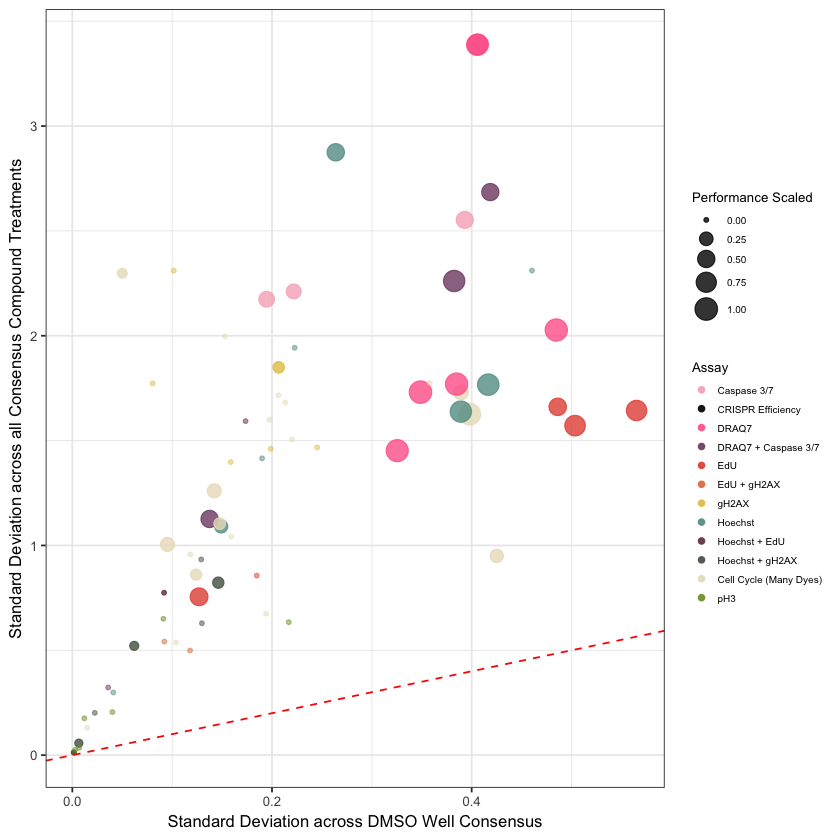

In [25]:
ggplot(std_dev_good_df,
       aes(x = std_dev_dmso_features, y = std_dev_compound_features)) +
    geom_point(aes(color = assay, size = performance_scaled),
               alpha = 0.8) +
    geom_point(data = bad_performing,
               aes(color = assay),
               size = 1,
               alpha = 0.5) +
    theme_bw() +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
    scale_color_manual(name = "Assay",
                       values = dye_colors,
                       labels = dye_labels) +
    scale_size_continuous(name = "Performance Scaled") + 
    xlab("Standard Deviation across DMSO Well Consensus") +
    ylab("Standard Deviation across all Consensus Compound Treatments") +
    theme(axis.text = element_text(size = 8),
          axis.title = element_text(size = 10),
          strip.text = element_text(size = 6),
          legend.text = element_text(size = 6),
          legend.title = element_text(size = 8),
         legend.key.size = unit(0.4, "cm"))

output_file <- file.path(output_dir, "dmso_vs_compound_standard_deviation.png")
ggsave(output_file, height = 5, width = 6, dpi = 500)